##### L2 正则化  （岭回归Ridge）
$$ \mathcal{L}(\mathbf{w}) = \|\mathbf{y} - \mathbf{X}\mathbf{w}\|_2^2 + \alpha \|\mathbf{w}\|_2^2 $$

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import Ridge 
"""
# 创建 Ridge 模型并设置所有参数
ridge_model = Ridge(
    alpha=1.0,               # 正则化强度，默认值为 1.0
    fit_intercept=True,      # 是否计算截距，默认值为 True
    copy_X=True,            # 是否复制特征矩阵 X，默认值为 True
    max_iter=None,          # 最大迭代次数，默认值为 None
    tol=1e-4,               # 求解器的收敛精度，默认值为 1e-4
    solver='auto',          # 求解器，默认值为 'auto'
    random_state=None,      # 随机数种子，默认值为 None
    positive=False          # 是否强制权重为非负数，默认值为 False
)
"""

"\n# 创建 Ridge 模型并设置所有参数\nridge_model = Ridge(\n    alpha=1.0,               # 正则化强度，默认值为 1.0\n    fit_intercept=True,      # 是否计算截距，默认值为 True\n    copy_X=True,            # 是否复制特征矩阵 X，默认值为 True\n    max_iter=None,          # 最大迭代次数，默认值为 None\n    tol=1e-4,               # 求解器的收敛精度，默认值为 1e-4\n    solver='auto',          # 求解器，默认值为 'auto'\n    random_state=None,      # 随机数种子，默认值为 None\n    positive=False          # 是否强制权重为非负数，默认值为 False\n)\n"

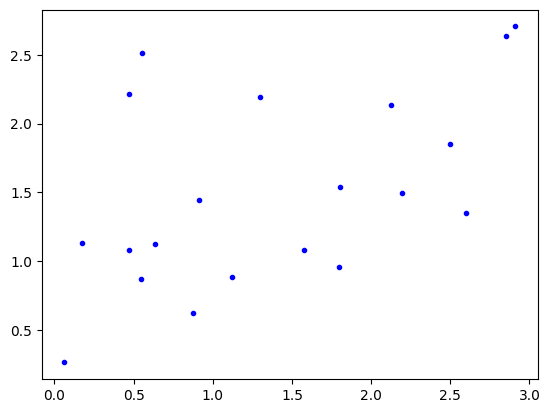

In [25]:
# 生成数据
np.random.seed(42)  # 设置种子 
m = 20
X = 3*np.random.rand(m,1)
y = 0.5*X+np.random.randn(m,1)/1.5 + 1
X_new = np.linspace(0,3,100).reshape(100,1) 
plt.plot(X,y,'b.')
plt.show()

In [ ]:
# 结果可视化函数--    模型复杂度， 正则化系数 , 模型参数(*可迭代对象/ **字典)
def plot_model(model_class, polynomail ,alphas, **model_kargs):
    # zip 将多个可迭代对象（如列表、元组等）中的元素逐一配对，返回一个由元组组成的迭代器
    for alpha,style in zip(alphas, ('b-','g--','r:')):
        model = model_class(alpha=alpha, **model_kargs)
        if polynomail:
            model =  Pipeline([
                ('poly_features',PolynomialFeatures(degree=10,include_bias=False)), # 特征选择
                ('StandardScaler',StandardScaler()),  # 标准化
                ('lin_reg',model)  # 拟合模型
            ])
        model.fit(X,y) # 训练模型
        y_new_regul = model.predict(X_new) # 预测
        plt.plot(X_new,y_new_regul,style,label = f'alpha = {alpha}')
    plt.plot(X,y,'b.')
    plt.legend()

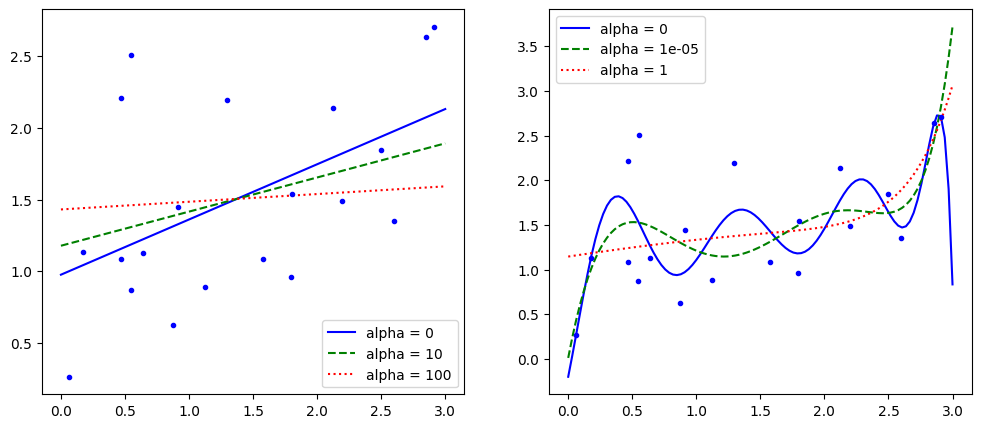

In [27]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plot_model(Ridge,polynomail =False,alphas=(0,10,100))
plt.subplot(122)
plot_model(Ridge,polynomail =True,alphas=(0,10**-5,1))
plt.show()

##### 索套回归（Lasso） L1正则化
$$\mathcal{L}(\mathbf{w}) = \|\mathbf{y} - \mathbf{X}\mathbf{w}\|_2^2 + \alpha \|\mathbf{w}\|_1$$

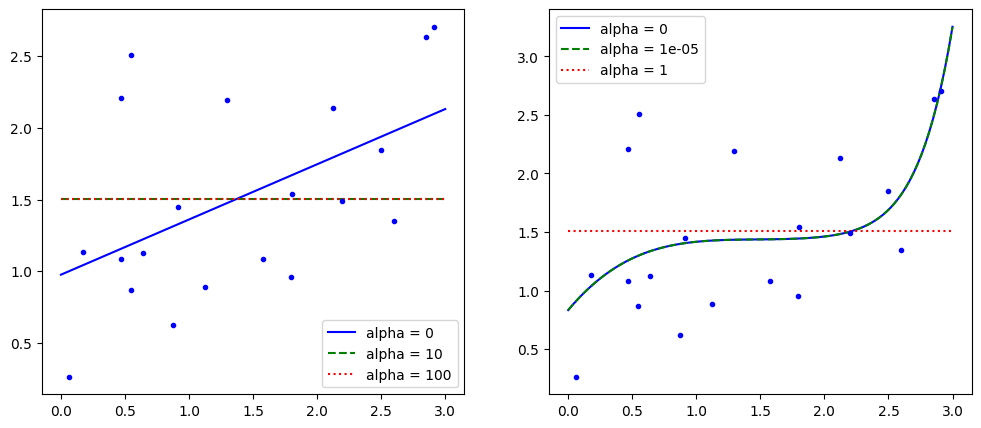

In [28]:
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,5))
plt.subplot(121)
plot_model(Lasso,polynomail =False,alphas=(0,10,100))
plt.subplot(122)
plot_model(Lasso,polynomail =True,alphas=(0,10**-5,1))
plt.show()